In [7]:
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
import seaborn as sns
import os

In [8]:
# load the mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

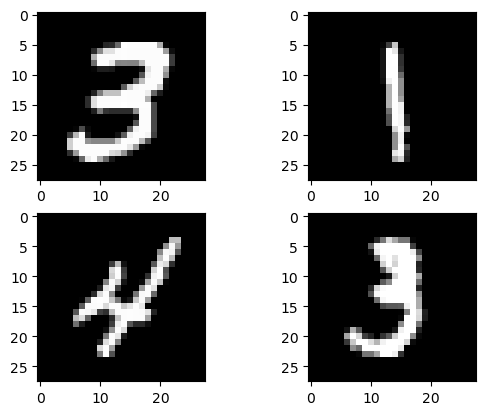

In [9]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[7], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[8], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[9], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[10], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [10]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [11]:
# define the CNN model
def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(num_classes, activation='softmax'))
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])
    
    return model

In [12]:
# build the model
model = cnn_model()

# fit the model
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

2023-07-13 13:06:14.984031: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-07-13 13:06:14.990128: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-07-13 13:06:15.608996: E tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:927] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-13 13:06:15.609589: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1050 computeCapability: 6.1
coreClock: 1.493GHz coreCount: 5 deviceMemorySize: 2.00GiB deviceMemoryBandwidth: 104.43GiB/s
2023-07-13 13:06:15.609688: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-07-13 13:06:15.656809: I tensorflow/stream_executor/platfor

Epoch 1/10


ValueError: in user code:

    /home/jhohannes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /home/jhohannes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/jhohannes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/jhohannes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/jhohannes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/jhohannes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /home/jhohannes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /home/jhohannes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/jhohannes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 3 but received input with shape (200, 28, 28, 1)


In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

In [ ]:
models_path = "../models/idx_models/"

os.makedirs(models_path, exist_ok=True)

# get the number of files in the directory
def get_num_files(path):
    if not os.path.exists(path):
        return 0
    return sum([len(files) for r, d, files in os.walk(path)])

# save the model with the current number
num_files = get_num_files(models_path)

model.save(os.path.join(models_path, f"idx_model_{num_files}.h5"))

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='red', label='acc')
plt.plot(hist.history['val_accuracy'], label='val_acc')
fig.show()

In [ ]:
fig
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')

In [ ]:
predictions_original = model.predict(X_test)
rounded_predictions = np.apply_along_axis(lambda x: np.round(x), 1, predictions_original)

In [ ]:
rounded_predictions

In [ ]:
predictions = tf.argmax(rounded_predictions, axis=1)
y_test_argmax = tf.argmax(y_test, axis=1)


In [ ]:
cm = tf.math.confusion_matrix(y_test_argmax, predictions)
cm = cm/cm.numpy().sum(axis=1)[:, tf.newaxis]

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=0.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Confusion matrix")
plt.show()

In [15]:
ld_model = tf.keras.models.load_model(os.path.join('../models/idx_models', "idx_model_0.h5"))

2023-07-13 13:45:13.473462: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-07-13 13:45:14.763812: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7


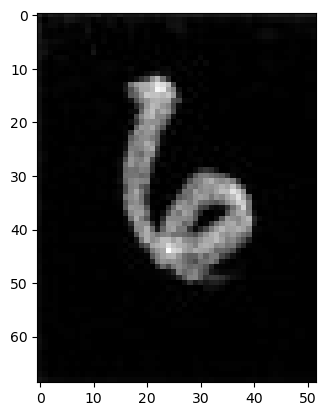

In [16]:
import cv2
# Load the image in grayscale
img = cv2.imread(os.path.join('../col_idx', 'scan0004.jpg-fifth.jpg'), cv2.IMREAD_GRAYSCALE)
img = np.invert(img)
plt.imshow(img, cmap='gray')
# Reshape and normalize the image
img = np.expand_dims(img, axis=-1)  # Add an extra axis for the single channel
img = np.expand_dims(img, axis=0)  # Add batch dimension
img = img / 255.0  # Normalize the pixel values

# Resize the image using tf.image.resize
img = tf.image.resize(img, [28, 28])


prediction = ld_model.predict(img)

In [17]:
prediction

array([[0.05765092, 0.02676362, 0.04281959, 0.06108956, 0.06336313,
        0.08619896, 0.5826833 , 0.02247846, 0.04349123, 0.01346127]],
      dtype=float32)

In [18]:
np.argmax(prediction)

6